In [1]:
from importlib import reload
import src.decks
import src.saving
reload(src.saving);
reload(src.decks);
from src.parser import Parser
from src.heatmaps import make_heatmap
from src.decks import Deck, deckGen, loadDeck
import numpy as np
from textwrap import wrap
import pandas as pd
from itertools import permutations

In [2]:
from typing import Literal

In [3]:
y = deckGen(numDecks=40000, chunkSize=10000, filename='decktest_deck4')

In [4]:
w = Parser(y, bits=3)
res = w.rawOut()

In [5]:
res

[('100', '110', [np.int64(1451), np.int64(38190), np.int64(359)]),
 ('100', '000', [np.int64(39999), np.int64(1), np.int64(0)]),
 ('100', '011', [np.int64(19394), np.int64(19386), np.int64(1220)]),
 ('100', '001', [np.int64(39904), np.int64(76), np.int64(20)]),
 ('100', '101', [np.int64(19477), np.int64(19353), np.int64(1170)]),
 ('100', '111', [np.int64(32141), np.int64(7092), np.int64(767)]),
 ('100', '010', [np.int64(22350), np.int64(16839), np.int64(811)]),
 ('110', '100', [np.int64(38190), np.int64(1451), np.int64(359)]),
 ('110', '000', [np.int64(39500), np.int64(406), np.int64(94)]),
 ('110', '011', [np.int64(83), np.int64(39904), np.int64(13)]),
 ('110', '001', [np.int64(18986), np.int64(19151), np.int64(1863)]),
 ('110', '101', [np.int64(34478), np.int64(5015), np.int64(507)]),
 ('110', '111', [np.int64(20205), np.int64(18989), np.int64(806)]),
 ('110', '010', [np.int64(36741), np.int64(2739), np.int64(520)]),
 ('000', '100', [np.int64(1), np.int64(39999), np.int64(0)]),
 ('00

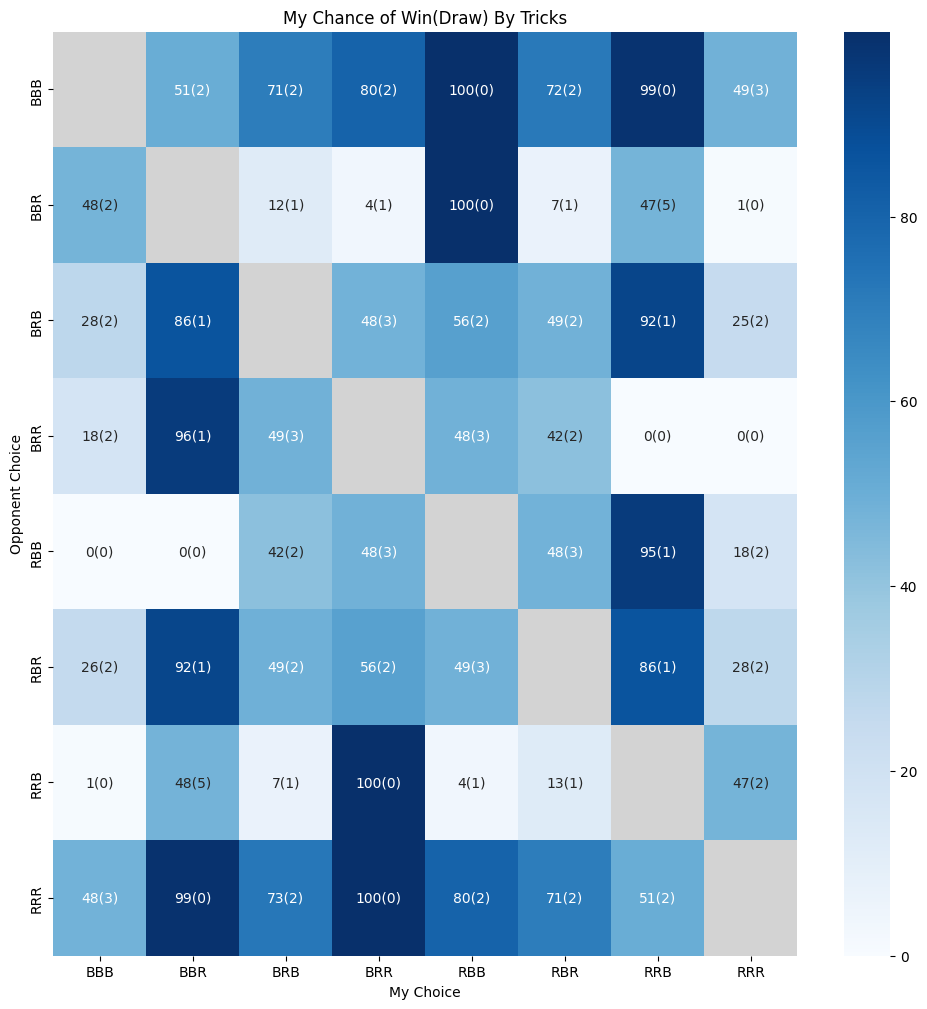

In [6]:
make_heatmap(res)

In [ ]:
res2 = w.add_decks(40000)

0 ('100', '110', [np.int64(1451), np.int64(38190), np.int64(359)]) ('100', '110', [np.int64(1451), np.int64(38190), np.int64(359)]) ('100', '110', array([ 1439, 38197,   364]))
1 ['100100', '110', [np.int64(1451), np.int64(38190), np.int64(359)]] ('100', '110', [np.int64(1451), np.int64(38190), np.int64(359)]) ('100', '110', array([ 1439, 38197,   364]))
2 ['100100', '110110', [np.int64(1451), np.int64(38190), np.int64(359)]] ('100', '110', [np.int64(1451), np.int64(38190), np.int64(359)]) ('100', '110', array([ 1439, 38197,   364]))
0 ('100', '000', [np.int64(39999), np.int64(1), np.int64(0)]) ('100', '000', [np.int64(39999), np.int64(1), np.int64(0)]) ('100', '000', array([39999,     1,     0]))
1 ['100100', '000', [np.int64(39999), np.int64(1), np.int64(0)]] ('100', '000', [np.int64(39999), np.int64(1), np.int64(0)]) ('100', '000', array([39999,     1,     0]))
2 ['100100', '000000', [np.int64(39999), np.int64(1), np.int64(0)]] ('100', '000', [np.int64(39999), np.int64(1), np.int64(

[['100100', '110110', array([ 2890, 76387,   723])],
 ['100100', '000000', array([79998,     2,     0])],
 ['100100', '011011', array([38761, 38926,  2313])],
 ['100100', '001001', array([79804,   152,    44])],
 ['100100', '101101', array([38913, 38757,  2330])],
 ['100100', '111111', array([64329, 14074,  1597])],
 ['100100', '010010', array([44568, 33736,  1696])],
 ['110110', '100100', array([76387,  2890,   723])],
 ['110110', '000000', array([79050,   760,   190])],
 ['110110', '011011', array([  164, 79797,    39])],
 ['110110', '001001', array([38173, 38178,  3649])],
 ['110110', '101101', array([68958, 10046,   996])],
 ['110110', '111111', array([40358, 38077,  1565])],
 ['110110', '010010', array([73308,  5596,  1096])],
 ['000000', '100100', array([    2, 79998,     0])],
 ['000000', '110110', array([  760, 79050,   190])],
 ['000000', '011011', array([14127, 64280,  1593])],
 ['000000', '001001', array([37840, 40566,  1594])],
 ['000000', '101101', array([20357, 57869,  17